In [12]:

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action='ignore')

In [13]:
# 데이터 로드 및 전처리
data = pd.read_csv('서울경기.csv', parse_dates=['YMD_CD'])
data = data.drop(columns='Unnamed: 0')

In [14]:
data

,YMD_CD,SMCL_CD,PRST_NO,ITEM_CD,SALE_QTY,day_0,day_1,day_2,day_3,day_4,...,WEEKDAY,FRIDAY,HOLIDAY,SALE_QTY_lag1,SALE_QTY_lag2,SALE_QTY_lag3,SALE_QTY_lag4,SALE_QTY_lag5,SALE_QTY_lag6,SALE_QTY_lag7
0,2022-12-04,38,70233,76224935,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-04,38,70233,80001249,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-04,38,70233,80001263,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-04,38,70233,80176732,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-04,38,70233,80906032,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388667,2024-04-04,135,210671,9310441005269,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3388668,2024-04-04,135,210671,9310441005290,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3388669,2024-04-04,135,210671,9329982020877,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3388670,2024-04-04,135,210671,9414453903794,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# 필요한 열만 선택
selected_columns = ['YMD_CD', 'PRST_NO', 'ITEM_CD', 'SALE_QTY', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 
                    'WEEKDAY', 'FRIDAY', 'HOLIDAY', 'SALE_QTY_lag1', 'SALE_QTY_lag2', 'SALE_QTY_lag3', 'SALE_QTY_lag4', 
                    'SALE_QTY_lag5', 'SALE_QTY_lag6', 'SALE_QTY_lag7']
data = data[selected_columns]

# 각 지점별, 아이템별로 데이터를 분리하여 처리
grouped_data = data.groupby(['PRST_NO', 'ITEM_CD'])

# 예측 결과를 저장할 리스트 초기화
results = []

In [16]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [17]:
data = data.fillna(0)

In [18]:
for colum in data.columns:
    print(data[colum].isnull().value_counts())

False    3388672
Name: YMD_CD, dtype: int64
False    3388672
Name: PRST_NO, dtype: int64
False    3388672
Name: ITEM_CD, dtype: int64
False    3388672
Name: SALE_QTY, dtype: int64
False    3388672
Name: day_0, dtype: int64
False    3388672
Name: day_1, dtype: int64
False    3388672
Name: day_2, dtype: int64
False    3388672
Name: day_3, dtype: int64
False    3388672
Name: day_4, dtype: int64
False    3388672
Name: day_5, dtype: int64
False    3388672
Name: day_6, dtype: int64
False    3388672
Name: WEEKDAY, dtype: int64
False    3388672
Name: FRIDAY, dtype: int64
False    3388672
Name: HOLIDAY, dtype: int64
False    3388672
Name: SALE_QTY_lag1, dtype: int64
False    3388672
Name: SALE_QTY_lag2, dtype: int64
False    3388672
Name: SALE_QTY_lag3, dtype: int64
False    3388672
Name: SALE_QTY_lag4, dtype: int64
False    3388672
Name: SALE_QTY_lag5, dtype: int64
False    3388672
Name: SALE_QTY_lag6, dtype: int64
False    3388672
Name: SALE_QTY_lag7, dtype: int64


In [19]:
data

,YMD_CD,PRST_NO,ITEM_CD,SALE_QTY,day_0,day_1,day_2,day_3,day_4,day_5,...,WEEKDAY,FRIDAY,HOLIDAY,SALE_QTY_lag1,SALE_QTY_lag2,SALE_QTY_lag3,SALE_QTY_lag4,SALE_QTY_lag5,SALE_QTY_lag6,SALE_QTY_lag7
0,2022-12-04,70233,76224935,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-12-04,70233,80001249,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-12-04,70233,80001263,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-12-04,70233,80176732,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-12-04,70233,80906032,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388667,2024-04-04,210671,9310441005269,0,0,0,0,1,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3388668,2024-04-04,210671,9310441005290,0,0,0,0,1,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3388669,2024-04-04,210671,9329982020877,0,0,0,0,1,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3388670,2024-04-04,210671,9414453903794,0,0,0,0,1,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# 모든 열을 float64 타입으로 변환
data = data.astype({'SALE_QTY': 'float64', 'day_0': 'float64', 'day_1': 'float64', 'day_2': 'float64', 'day_3': 'float64',
                    'day_4': 'float64', 'day_5': 'float64', 'day_6': 'float64', 'WEEKDAY': 'float64', 'FRIDAY': 'float64',
                    'HOLIDAY': 'float64', 'SALE_QTY_lag1': 'float64', 'SALE_QTY_lag2': 'float64', 'SALE_QTY_lag3': 'float64',
                    'SALE_QTY_lag4': 'float64', 'SALE_QTY_lag5': 'float64', 'SALE_QTY_lag6': 'float64', 'SALE_QTY_lag7': 'float64'})

In [21]:
# 결측치나 무한대 값이 있는 행을 제거
# data = data.replace([np.inf, -np.inf], np.nan).dropna()
# 각 지점별, 아이템별로 데이터를 분리하여 처리
grouped_data = data.groupby(['PRST_NO', 'ITEM_CD'])

In [22]:
def predict_and_plot_sales(grouped_data, prst_no, item_cd, order=(1,1,1), seasonal_order=(1,1,1,7)):
    # 해당 지점과 아이템의 데이터 필터링
    start_date='2024-01-01'
    end_date='2024-03-31'

    group = None
    for (p_no, i_cd), grp in grouped_data:
        if p_no == prst_no and i_cd == item_cd:
            group = grp
            break
            
    if group is None:
        raise ValueError(f"No data found for PRST_NO: {prst_no}, ITEM_CD: {item_cd}")
    
    group = group.set_index('YMD_CD')
    endog = group[['SALE_QTY']]
    exog = group[['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'WEEKDAY', 
                  'FRIDAY', 'HOLIDAY', 'SALE_QTY_lag1', 'SALE_QTY_lag2', 'SALE_QTY_lag3', 'SALE_QTY_lag4',
                  'SALE_QTY_lag5', 'SALE_QTY_lag6', 'SALE_QTY_lag7']]
    
    # 학습 데이터와 테스트 데이터로 분리
    train_endog, test_endog, train_exog, test_exog = train_test_split(endog, exog, test_size=0.2, shuffle=False)
    
    # SARIMAX 모델 학습
    model = SARIMAX(train_endog, exog=train_exog, order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit(disp=False)
    
    # 예측 수행
    pred = fitted_model.forecast(steps=len(test_endog), exog=test_exog)
    
    # 결과 저장
    result = test_endog.copy()
    result['PREDICTED_SALE_QTY'] = pred
    
    # 시각화 (start_date부터 end_date까지)
    result_period = result.loc[start_date:end_date]
    
    plt.figure(figsize=(12, 6))
    plt.plot(result_period.index, result_period['SALE_QTY'], label='Actual Sales')
    plt.plot(result_period.index, result_period['PREDICTED_SALE_QTY'], label='Predicted Sales', linestyle='--')
    plt.title(f'Sales Prediction for PRST_NO: {prst_no}, ITEM_CD: {item_cd} ({start_date} to {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Sales Quantity')
    plt.legend()
    plt.grid(True)
    plt.show()

In [35]:
seasonal_order = (1, 1, 1, 7)
order=(1,1,1)

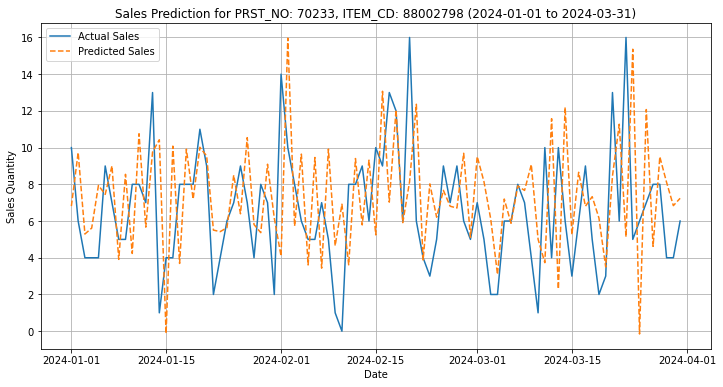

In [34]:
# SO : 11114
predict_and_plot_sales(grouped_data, 70233, 88002798, order, seasonal_order)

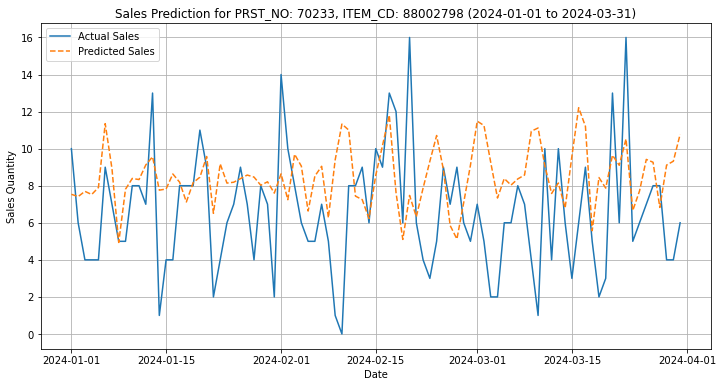

In [36]:
# SO 1117
predict_and_plot_sales(grouped_data, 70233, 88002798, order, seasonal_order)

In [26]:
data['PRST_NO'].unique()

array([ 70233,  70745,  90527, 110085, 120752, 170067, 190564, 210671])